In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import category_encoders as ce
from imblearn.over_sampling import SMOTE, SVMSMOTE

In [2]:
df = pd.read_csv('ShopeeData.csv')

In [145]:
len(df)

3867

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   itemid               3867 non-null   int64  
 1   shopid               3867 non-null   int64  
 2   liked_count          3867 non-null   int64  
 3   cmt_count            3867 non-null   int64  
 4   discount             3842 non-null   object 
 5   shop_location        3867 non-null   object 
 6   shop_rating          3867 non-null   float64
 7   name                 3867 non-null   object 
 8   historical_sold      3867 non-null   int64  
 9   price                3867 non-null   float64
 10  rating_star          3867 non-null   float64
 11  rating_count         3867 non-null   int64  
 12  rcount_with_context  3867 non-null   int64  
 13  status               3867 non-null   object 
 14  Date                 3867 non-null   object 
dtypes: float64(3), int64(7), object(5)
mem

In [147]:
df['shop_location'].value_counts()

shop_location
HÃ  Ná»™i    3867
Name: count, dtype: int64

In [5]:
df['itemid'].value_counts()

itemid
20030969576    22
21974114545    22
5431288093     22
4887949703     22
2670835879     22
               ..
5260205238      4
24320863474     4
24671491249     3
24321557597     2
25205746040     1
Name: count, Length: 196, dtype: int64

In [148]:
df['name'].value_counts()

name
Sá»¯a Rá»­a Máº·t CeraVe SA Smoothing, Hydrating, Foaming Cleanser - Cho Da Dáº§u Má»¥n, KhÃ´, Nháº¡y Cáº£m 88ml â€“ 236ml â€“ 473ml    22
NÆ°á»›c Táº©y Trang L'Oreal Paris 3in1 Micellar Water 95ml - 400ml, LÃ m Sáº¡ch, DÆ°á»¡ng áº¨m Cho Má»i Loáº¡i Da Loreal               22
Sá»¯a Rá»­a Máº·t Giáº£m Má»¥n Ngá»«a Khuáº©n - Ziaja Med Anti Imperfections Formula Cleansing Gel 200ml                                22
Kem DÆ°á»¡ng SVR SEBIACLEAR Active Gel 40ml, LÃ m Giáº£m Má»¥n VÃ  GiÃºp Loáº¡i Bá» Dáº§u Cho Da                                       22
Kem Giáº£m Má»¥n vÃ  Nhá»n Eucerin Pro Acne A.I Clearing Treatment 40ml - Má» Váº¿t ThÃ¢m, TÃ¡i Táº¡o Da, Tinh Cháº¥t                 22
                                                                                                                                        ..
Xá»‹t DÆ°á»¡ng CÃ¢n Báº±ng Da Ziaja Manuka Tree Purifying Astringent Face Toner 200ml - GiÃºp Se KhÃ­t Lá»— ChÃ¢n LÃ´ng                  4
Sá»¯a Rá»­a Máº·t Ziaj

In [149]:
df['name'].value_counts().to_excel('name.xlsx')

In [150]:
df['shop_rating'].value_counts()

shop_rating
4.931027    160
4.931038    118
4.931052    103
4.931017    103
4.931058    101
           ... 
4.931030      3
4.930954      3
4.931238      2
4.931080      2
4.931006      1
Name: count, Length: 94, dtype: int64

In [151]:
df['status'].value_counts()

status
normal    3867
Name: count, dtype: int64

In [152]:
df = df.drop(columns=['status', 'itemid', 'shopid', 'shop_location'])

# Preprocessing data

In [153]:
df.isnull().sum()

liked_count             0
cmt_count               0
discount               25
shop_rating             0
name                    0
historical_sold         0
price                   0
rating_star             0
rating_count            0
rcount_with_context     0
Date                    0
dtype: int64

In [154]:
df['discount'].fillna('0%', inplace=True)
df['discount'] = df['discount'].str.replace('%', '').astype(int)

# Data analysis

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   liked_count          3867 non-null   int64  
 1   cmt_count            3867 non-null   int64  
 2   discount             3867 non-null   int64  
 3   shop_rating          3867 non-null   float64
 4   name                 3867 non-null   object 
 5   historical_sold      3867 non-null   int64  
 6   price                3867 non-null   float64
 7   rating_star          3867 non-null   float64
 8   rating_count         3867 non-null   int64  
 9   rcount_with_context  3867 non-null   int64  
 10  Date                 3867 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 332.4+ KB


In [156]:
category = [c for c in df.columns if df[c].dtype == 'object']
numeric = [n for n in df.columns if df[n].dtype != 'object']

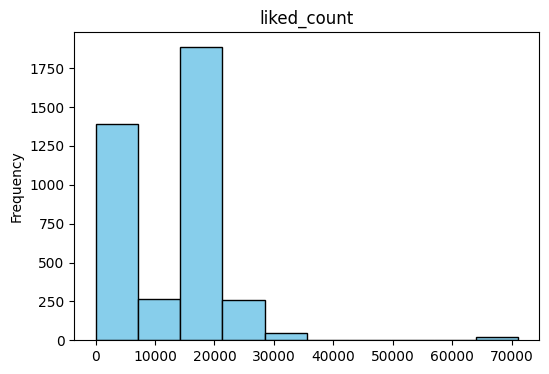

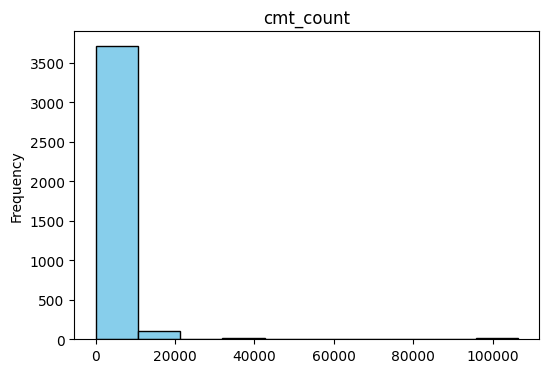

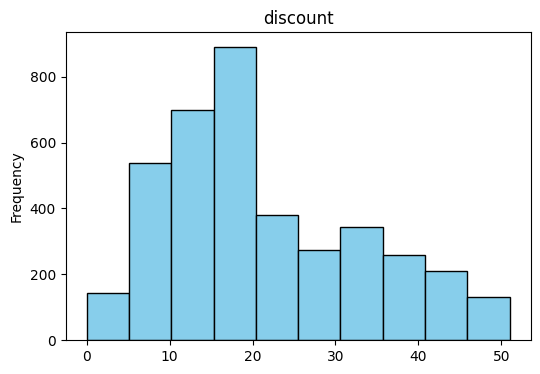

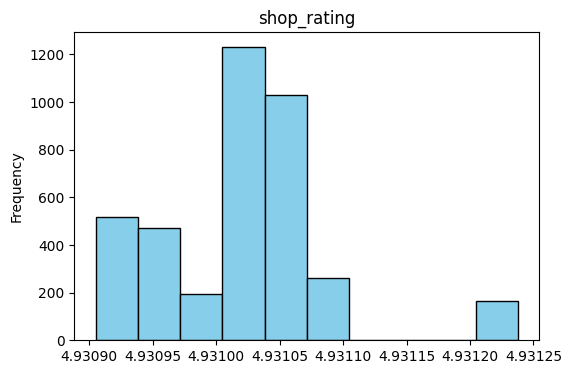

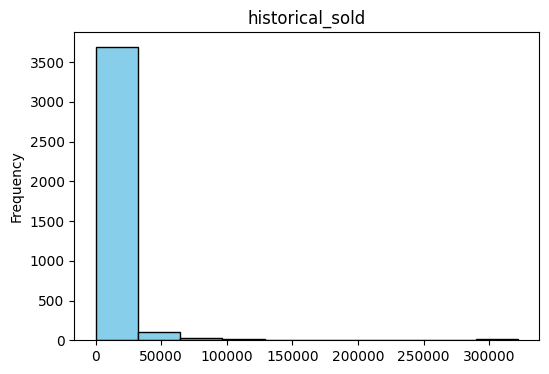

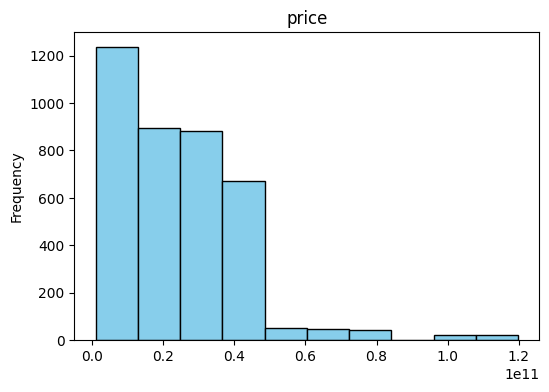

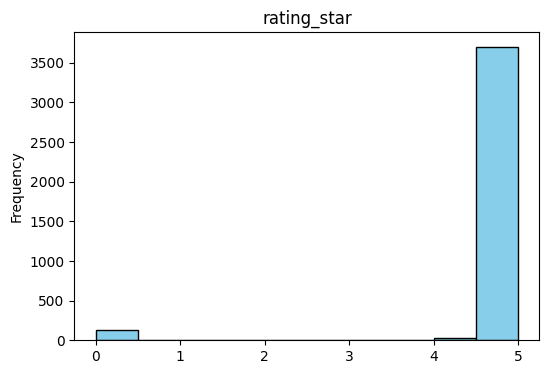

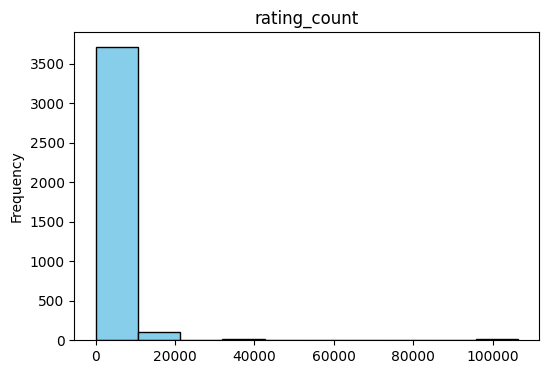

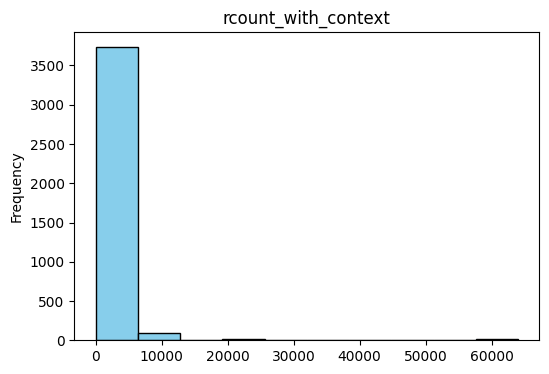

In [157]:
for col in numeric:
    plt.figure(figsize=(6,4))
    df[col].plot(kind='hist', color='skyblue', edgecolor='black')
    plt.title(col)
    plt.show()

In [158]:
data = df.copy()
he = ce.HashingEncoder(cols=['name', 'Date'])
data_hash = he.fit_transform(data)

In [159]:
dataset_hash_dummy = pd.get_dummies(data_hash, drop_first=True)
dataset_hash_dummy

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,liked_count,cmt_count,discount,shop_rating,historical_sold,price,rating_star,rating_count,rcount_with_context
0,0,0,0,1,1,0,0,0,25677,9675,11,4.931227,35701,9.200000e+09,4.906667,9675,5639
1,0,0,0,0,1,0,1,0,20032,6504,40,4.931227,23141,6.600000e+09,4.922202,6504,4034
2,1,0,0,0,1,0,0,0,18760,2611,4,4.931227,8489,1.150000e+10,4.932976,2611,1441
3,0,0,0,0,1,0,1,0,14582,8600,47,4.931225,28022,7.900000e+09,4.922916,8602,5430
4,0,0,0,0,1,1,0,0,29919,19065,22,4.931228,69948,1.090000e+10,4.915548,19068,10715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,0,0,0,0,1,0,1,0,7,2,17,4.931019,7,9.990000e+10,5.000000,2,1
3863,0,0,0,1,1,0,0,0,3,2,14,4.931023,8,3.390000e+10,5.000000,2,1
3864,1,0,0,0,1,0,0,0,1,0,10,4.931019,2,2.385000e+10,0.000000,0,0
3865,0,0,0,0,2,0,0,0,1,0,15,4.931018,1,6.500000e+10,0.000000,0,0


In [160]:
dataset_hash_dummy.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'liked_count', 'cmt_count', 'discount', 'shop_rating',
       'historical_sold', 'price', 'rating_star', 'rating_count',
       'rcount_with_context'],
      dtype='object')

In [161]:
# # View correlation
# corr = data.corr()
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# View correlation
corr = dataset_hash_dummy.corr()
corr.style.background_gradient(cmap='coolwarm')

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,liked_count,cmt_count,discount,shop_rating,historical_sold,price,rating_star,rating_count,rcount_with_context
col_0,1.000000,-0.119389,-0.127076,-0.152784,-0.163192,-0.127961,-0.159024,-0.111476,-0.046476,-0.048053,0.038596,0.113251,-0.052421,0.000190,-0.063757,-0.048064,-0.048825
col_1,-0.119389,1.000000,-0.118453,-0.147275,-0.155506,-0.112121,-0.147380,-0.102491,-0.035163,-0.050793,0.017025,0.135247,-0.054534,-0.000309,0.058113,-0.050786,-0.050677
col_2,-0.127076,-0.118453,1.000000,-0.139350,-0.159286,-0.121193,-0.149873,-0.100494,0.022571,-0.027145,-0.006936,-0.177825,-0.029475,0.054456,-0.002819,-0.027144,-0.024081
col_3,-0.152784,-0.147275,-0.139350,1.000000,-0.187205,-0.140681,-0.185582,-0.125854,-0.028124,-0.026874,0.008180,-0.149868,-0.024281,-0.065315,0.053629,-0.026887,-0.027521
col_4,-0.163192,-0.155506,-0.159286,-0.187205,1.000000,-0.162205,-0.233421,-0.124400,0.015472,-0.042428,-0.019093,0.056101,-0.046787,0.084586,-0.025823,-0.042417,-0.043435
col_5,-0.127961,-0.112121,-0.121193,-0.140681,-0.162205,1.000000,-0.151572,-0.100639,0.034449,0.070918,-0.016288,0.094484,0.082768,-0.081971,0.027498,0.070922,0.075131
col_6,-0.159024,-0.147380,-0.149873,-0.185582,-0.233421,-0.151572,1.000000,-0.114078,0.032840,0.115043,0.019451,0.019669,0.111919,0.046226,-0.072719,0.115037,0.110555
col_7,-0.111476,-0.102491,-0.100494,-0.125854,-0.124400,-0.100639,-0.114078,1.000000,-0.000928,0.000529,-0.050102,-0.104638,0.006330,-0.068839,0.050557,0.000540,0.001551
liked_count,-0.046476,-0.035163,0.022571,-0.028124,0.015472,0.034449,0.032840,-0.000928,1.000000,0.527380,-0.062556,0.000887,0.525997,0.063217,0.193678,0.527374,0.523616
cmt_count,-0.048053,-0.050793,-0.027145,-0.026874,-0.042428,0.070918,0.115043,0.000529,0.527380,1.000000,0.205146,0.000389,0.996688,-0.165712,0.045896,1.000000,0.998697


In [ ]:
# Remove correlation columns
# dataset_hash_dummy_drop_corr = dataset_hash_dummy.drop(columns=["voice_mail_plan_yes","total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"])